# Build a Synth in Five Lines (of your own code)
## About
* Remy Porter
* "Creative Coder" @ Iontank
* Amateur Violinist
* Incredibly Lazy

# A Lesson in False Advertising
* I didn't actually count the lines
* There will be more than five
* You don't actually NEED five
* Counting lines of code is silly

In [19]:
## Three Line Synthesis
import numpy as np
import sounddevice as sd
sd.play(np.sin(np.linspace(0, 1, 44100) * 2 * np.pi * 440))

# What We're Going to Do
* Talk music & sound
* Talk about *numbers* and music and Numeric Python
* Make some bleeps and bloops
* Use intuition to fumble our way to interesting results

## And We're Going to Build it Simply
* Most of our code will be 1-line functions
* We'll rely heavily on the NumPy library for math
* We'll let `sounddevice` handle actually outputting our sound
* Most diagrams will be Matplotlib

# Music
## What is Music?
<img src="images/sheetmusic.jpg">

## Terms
* Notes
* Beats
* Rhthyms
* Tones

## Other Tools
<a title="Nina Richards (who can be contacted via ZoeB). [CC BY 3.0 (https://creativecommons.org/licenses/by/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Doepfer_A-100.jpg"><img width="512" alt="Doepfer A-100" src="images/modularsynth.jpg"></a>
* Music as a construct
* Wiring describes patterns

## Bebe and Louis Barron
* [Composers, most notable for Forbidden Planet soundtrack](https://www.npr.org/templates/story/story.php?storyId=4486840)
* Directly built circuits *using an intuition* about how they should work
* Collaged pieces together by tape-recording circuits

# What is Music?
**A Time Varying Signal**

# Time
* Is continuous
* Computers aren't good at continuous
* Wait, haven't I heard the word "sampling" before?

In [2]:
# sample time
np.linspace(0, 1, 44100) #count from 0-1 in 44,100 steps

array([0.00000000e+00, 2.26762512e-05, 4.53525023e-05, ...,
       9.99954647e-01, 9.99977324e-01, 1.00000000e+00])

In [24]:
SAMPLE_RATE=44100
def space(duration, sample_rate=SAMPLE_RATE):
  """Generate a temporal space of `duration` seconds at `sample_rate` sampling frequency"""
  return np.linspace(0, duration, duration*sample_rate)
one_second = space(1)

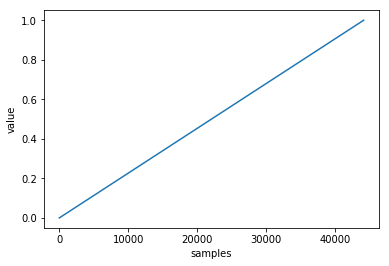

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.axes(xlabel="samples", ylabel="value")
plt.plot(one_second)

## What's a Note?
* Some sort of wave, right?
* I know what a sin wave is, and NumPy has a sin function

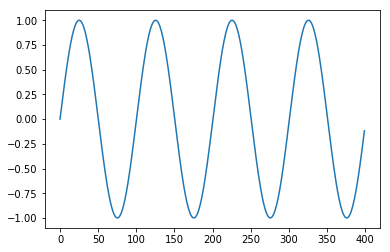

In [27]:
sin440 = np.sin(one_second*2*np.pi*440)
plt.plot(sin440[0:400])

In [29]:
sd.play(sin440)

In [42]:
# that seems useful, let's make a convenience function
def sin(space, freq, shift=0):
  """Convert an input space to a sinusoidal wave with `freq` frequency. `shift` moves the phase."""
  return np.sin(2*np.pi*space*freq+shift)

## NumPy and Broadcasting
* Numpy's core feature is that it efficiently operates on ENTIRE arrays
* "vectorized" functions

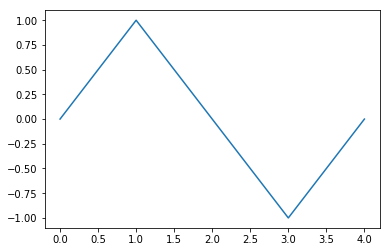

In [39]:
plt.plot(np.sin(np.linspace(0, 2*np.pi, 5)))

In [36]:
print(np.array([0.25, 0.5, 0.75]) * 2 * np.pi)
print(np.array([0.25, 0.5, 0.75]) + np.array([0.75, 0.5, 0.25]))

[1.57079633 3.14159265 4.71238898]
[1. 1. 1.]


## Wait… we can add arrays together?

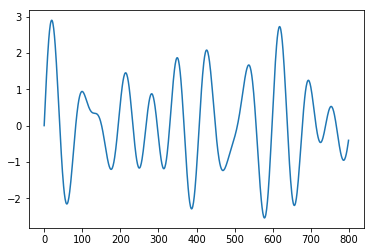

In [49]:
a = sin(one_second, 440)
c = sin(one_second, 523.35)
e = sin(one_second, 659.25)
chord = a + c + e
plt.plot(chord[0:800])

In [45]:
sd.play(chord)

In [47]:
sd.play(chord/3) #broadcasting!

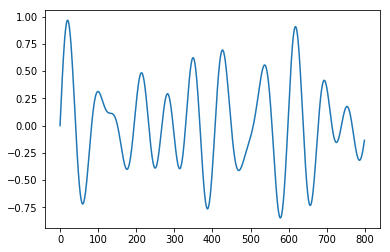

In [50]:
plt.plot(chord[0:800]/3)

## Wait, so we just added, sined, divided…
that gives me an idea…

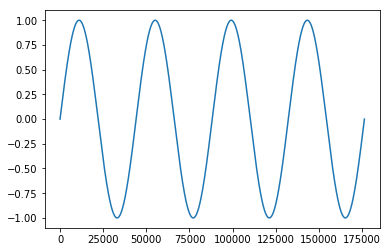

In [57]:
four_seconds = space(4)
a = sin(four_seconds, 440)
hz1 = sin(four_seconds, 1)
plt.plot(hz1)

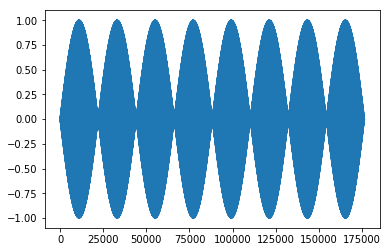

In [59]:
plt.plot(a*hz1)

In [61]:
sd.play(a*hz1)

In [70]:
c = sin(four_seconds, 523.35)
e = sin(four_seconds, 659.25)
beated = (a * sin(four_seconds, 0.66666) +
  c * sin(four_seconds, 0.7) +
  e * sin(four_seconds, 2.5)) / 3.
sd.play(beated)

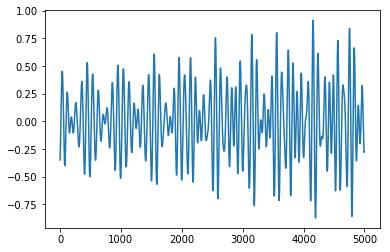

In [71]:
plt.plot(beated[8000:13000])

# Sin of the Times?
* Sin is useful, but what other waveforms might we want?
* Sawtooth? Triangle? Square?

## Square should be easy
* It's either positive, or negative, or maybe crossing zero

In [73]:
np.sign([-0.5, 0.5])

array([-1.,  1.])

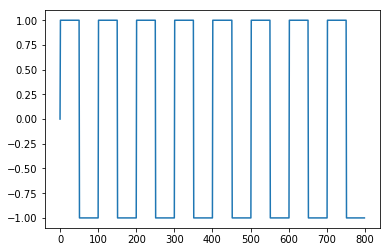

In [75]:
plt.plot(np.sign(a)[0:800])

In [78]:
sd.play(np.sign(a)*0.25) # this "feels" louder, so I'm shrinknig the wave

In [79]:
def square(space, freq, shift=0):
  """Generate a square wave by gating a sin"""
  return np.sign(sin(space, freq, shift))

In [82]:
sqA = square(four_seconds, 440) * 0.25
sd.play(hz1 * sqA)

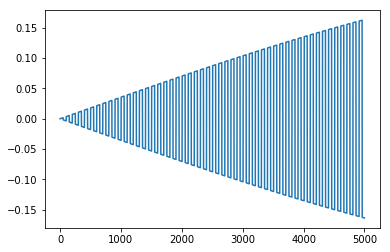

In [87]:
plt.plot((hz1 * sqA)[0:5000])

## Making Beats?
* Squares make natural beats
* Because we multiply waves together, we need to constrain wave to [0, 1]

In [90]:
np.heaviside([-1, -0.5, 0, 0.5, 1], 0) # everything <= 0 is 0, everything greater than 0 is 1

array([0., 0., 0., 1., 1.])

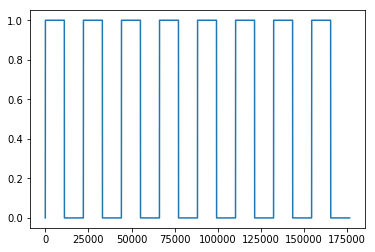

In [91]:
bpm120 = np.heaviside(square(four_seconds, 2), 0)
plt.plot(bpm120)

In [92]:
sd.play(bpm120 * (a + c + e) / 3)

# Broadcasting the Broadcasted

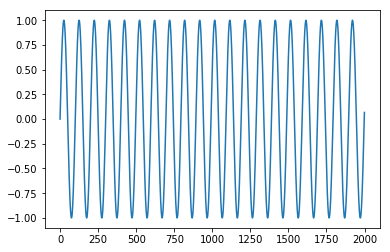

In [99]:
lfo = sin(one_second, 10) * 5
wat = sin(one_second, lfo+440)
plt.plot(wat[0:2000])

In [102]:
sd.play(wat)

## We can make our frequency an array?!
```
def sin(space, freq, shift=0):
  """Convert an input space to a sinusoidal wave with `freq` frequency. `shift` moves the phase."""
  return np.sin(2*np.pi*space*freq+shift)
```
* We can multiply and add arrays together, and that's all we're doing here!


## Wait, that gives me another idea…

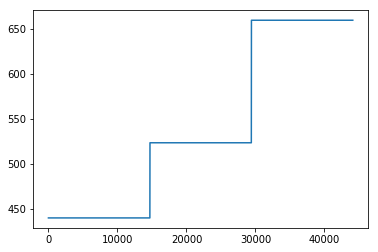

In [104]:
buffer = np.zeros((SAMPLE_RATE)) # one second of zeros
buffer[::] = 440
buffer[int(SAMPLE_RATE/3):] = 523.35
buffer[int(2*SAMPLE_RATE/3):] = 659.25
plt.plot(buffer)

In [107]:
sd.play(square(one_second, buffer)*0.25)

In [112]:
sd.play(
    square(one_second, buffer)*0.25*sin(one_second, 3)
)

# Rinse and Repeat?

In [113]:
def repeat(space, data_space):
  """Repeat a dataset to fill our entire space via tiling"""
  return np.tile(data_space, int(len(space)/len(data_space)))

In [130]:
arped = square(one_second, buffer)*0.25*sin(one_second, 3)
long_arp = repeat(four_seconds, arped)
sd.play(long_arp)

# Other Synth Functions
* Other waveforms?
* Normalization?
* Actual composition?

## Waveforms

In [131]:
def saw(space, freq, shift=0):
  """Sawtooth wave"""
  return np.arctan(
    1. / np.tan(
      space * np.pi * freq + shift
    )
  )

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


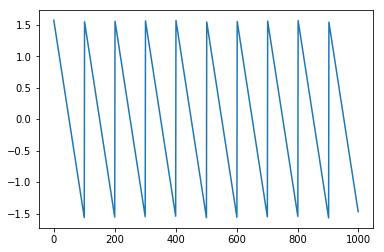

In [152]:
plt.plot(saw(one_second, 440)[0:1000])

In [136]:
sd.play(saw(one_second, 440)*0.25)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [142]:
def pulse(space, freq, duty_cycle=0.5, shift=0, normalize=True):
  """
  Generate a rectangular wave with a given duty cycle 

  This wave may either be in the range [0,1] (if normalize==False)
  or may be in the range [-1,1] (if normalize==True, the default)
  """
  s = square(space, freq, shift)
  t = square(space, freq, shift+duty_cycle*2*np.pi)
  wav = np.heaviside(s-t,0)
  if normalize:
    return wav * 2. - 1
  return wav

In [143]:
dc25 = pulse(one_second, 440, 0.25)
dc12 = pulse(one_second, 440, 0.12)
dc50 = pulse(one_second, 440, 0.5)

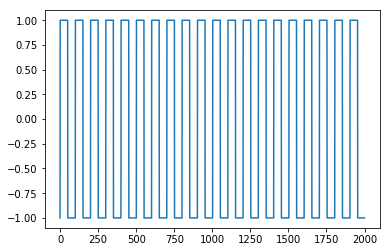

In [145]:
plt.plot(dc50[0:2000])

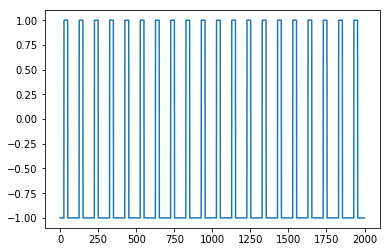

In [146]:
plt.plot(dc25[0:2000])

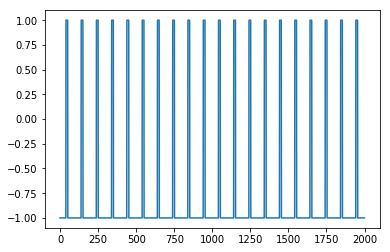

In [147]:
plt.plot(dc12[0:2000])

In [148]:
sd.play(dc50*0.25)

In [149]:
sd.play(dc25*0.25)

In [150]:
sd.play(dc12*0.25)

## Normalization
We want to control the maximum range of our waveforms

In [153]:
def scale_normalize(space):
  """
  Take an arbitrary range and compact it into the range -1,1
  by scaling it relative to its peaks.

  input sets smaller than the input range will be scaled UP
  """
  mx = np.max(np.abs(space))
  return space / mx

In [154]:
def smoothstep(edge0, edge1, x):
  """
  Hermite Interpolation, lifted from OpenGL shaders.

  Converts a data stream into a sigmoid from edge0 to edge1 (outputting in the range [0.,1.])
  """
  t = np.clip((x - edge0) / (edge1 - edge0), 0.0, 1.0)
  return t * t * (3.0 - 2.0 * t)

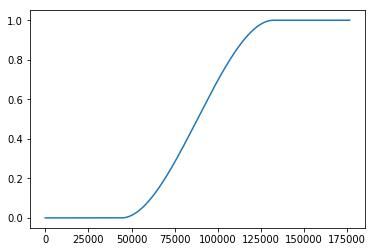

In [158]:
plt.plot(smoothstep(1, 3, four_seconds))

In [159]:
def smooth_normalize(space):
  """
  Take an arbitrary range and compact it into the range -1,1,
  by applying a `smoothstep`
  
  input sets smaller than -1,1 are left unchanged
  """
  mi = np.min(space)
  mx = np.max(space)
  if mi >= -1. and mx < 1.:
    return space
  return smoothstep(np.min(space), np.max(space), space) * 2. - 1.

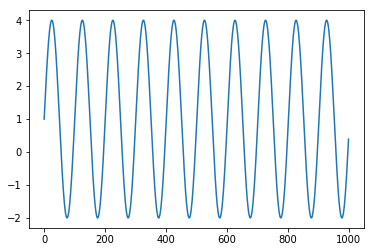

In [163]:
plt.plot((sin(one_second, 440) * 3 + 1)[0:1000]) # a normal "overdriven" sin wave

In [184]:
sd.play(sin(one_second, 440) * 3 + 1)

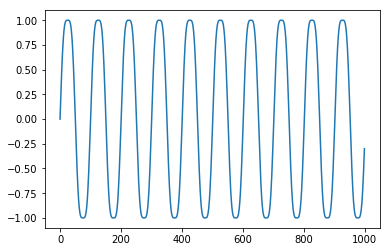

In [164]:
plt.plot(smooth_normalize(sin(one_second, 440) * 3 + 1)[0:1000]) #normalized via smoothstep

In [181]:
sd.play(smooth_normalize(sin(one_second, 440) * 3 + 1))

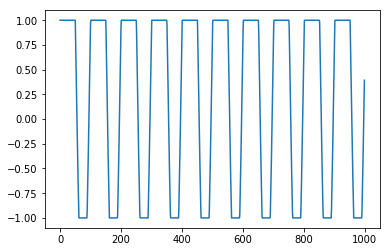

In [175]:
# or we clip
plt.plot(np.clip(sin(one_second, 440) * 3 + 1, -1., 1.)[0:1000])

In [183]:
sd.play(np.clip(sin(one_second, 440) * 3 + 1, -1., 1.))

## Let's look at smoothstep again

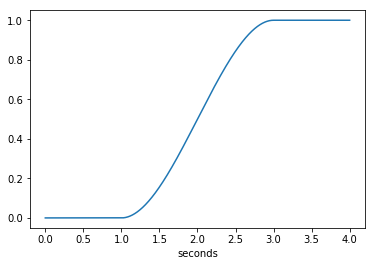

In [169]:
plt.axes(xlabel="seconds")
plt.plot(four_seconds, smoothstep(1, 3, four_seconds))

In [171]:
gate = smoothstep(1, 1.5, four_seconds)
sd.play(a * gate)

In [196]:
a_gate = smoothstep(0, 1, four_seconds)
c_gate = smoothstep(1, 2, four_seconds)
e_gate = smoothstep(2, 3, four_seconds)
sequence = (a * a_gate + c * c_gate + e * e_gate)
sd.play(smooth_normalize(sequence))

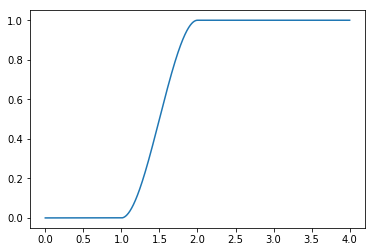

In [201]:
plt.plot(four_seconds, c_gate)

In [202]:
a_gate = smoothstep(0, 0.25, four_seconds) - smoothstep(1, 2, four_seconds) + smoothstep(2.5, 3, four_seconds) - smoothstep(3, 4, four_seconds)
c_gate = smoothstep(0.35, 0.5, four_seconds) - smoothstep(1, 3, four_seconds)
e_gate = smoothstep(2, 3, four_seconds) - smoothstep(3, 4, four_seconds)
sequence = (a * a_gate + c * c_gate + e * e_gate)
sd.play(smooth_normalize(sequence))

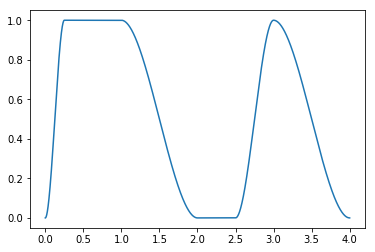

In [203]:
plt.plot(four_seconds, a_gate)

# Smoothstep seems useful…

In [248]:
def sigmoid(space, freq, shift=0):
  """Convert an input space to a sigmoidal wave with `freq` frequency. `shift` moves the phase."""
  return smoothstep(0, 1., sin(space, freq, shift)) + smoothstep(-1., 0., sin(space, freq, shift))

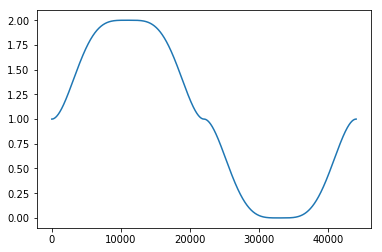

In [249]:
plt.plot(sigmoid(one_second, 1))

# A Short Song

In [243]:
import shaded as sd
from sounddevice import play
song = sd.space(13)
overall_env = sd.smoothstep(0,1,song) - sd.smoothstep(12,14.8,song)


In [244]:
bass_line = sd.arp(song, [110, 130.81, 146.83, 110]*5) #this time, the "*" means we're repeating
bass_line_wave = smooth_normalize(sin(song, bass_line) * sd.pulse(song, 3, 0.333, normalize=False))
play(bass_line_wave)

In [245]:
drums = sd.noise(song) * sd.sigmoid(song, 10) * sd.sigmoid(song, 12, 0.25*2*np.pi) * 0.2
play(drums)

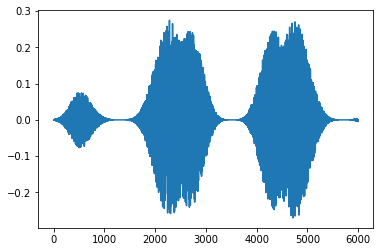

In [253]:
plt.plot(drums[2000:8000])

In [246]:
melody_a = sd.arp(song, [440, 880, 440, 220])
melody_b = sd.arp(song, [523.25, 392.00, 659.25]*6)
string = sd.saw(song, melody_a) * 0.25 + sd.saw(song, melody_b) * 0.25
play(string*0.5)

In [247]:
full_song = bass_line_wave * smoothstep(2, 3, song) + drums * 0.25 + string * 0.5 * (smoothstep(4, 6, song) - smoothstep(8, 10, song))
play(scale_normalize(full_song) * overall_env)

# Final Thoughts
* Even our "complex" song, is a relatively short amount of code
* Each piece of this code is simple, in and of itself
* Complex behavior emerges from simple systems

# We Don't Need to Know What We're Doing
* I didn't know this would work
* I didn't need to make it good, just good enough
* I had a lot of fun building it

<img height="240" src="images/bobross.jpg">
> <strike>Painting</strike> Programming should make you happy.